# Taller Interactivo: Árboles de Decisión y Evaluación de Modelos

## Caso de Estudio: Social_Network_Ads

Este taller profesional se centra en la construcción, interpretación y evaluación de un modelo de Árbol de Decisión utilizando el dataset _Social_Network_Ads_. Se evaluarán aspectos técnicos y se comparará el desempeño con un modelo de Regresión Logística, analizando métricas de evaluación y posibles indicadores de sobreajuste.

## 2. Objetivos del Taller

En este taller se pretende:
- Comprender los fundamentos teóricos de los árboles de decisión.
- Realizar un análisis exploratorio y revisión de datos.
- Aplicar la estratificación en el particionado de datos.
- Entrenar y evaluar un modelo de Árbol de Decisión.
- Visualizar y analizar la matriz de confusión y la curva ROC.
- Ajustar el modelo para controlar la complejidad y el sobreajuste.
- Promover el análisis crítico de los resultados obtenidos.

## 3. Carga del Dataset y Primer Análisis

En esta sección se carga el dataset _Social_Network_Ads_ desde una URL y se visualizan las primeras filas y la información general. Esto permitirá conocer la estructura de los datos y los tipos de variables presentes.

In [1]:
!wget https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv

--2025-04-03 20:17:50--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/Social_Network_Ads.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10926 (11K) [text/plain]
Saving to: ‘Social_Network_Ads.csv’

Social_Network_Ads. 100%[===================>]  10.67K  --.-KB/s    in 0.001s  

2025-04-03 20:17:51 (19.3 MB/s) - ‘Social_Network_Ads.csv’ saved [10926/10926]



In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# Mostrar las primeras filas
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


## 4. Revisión de Variables y Tipos de Datos

Examina las variables del dataset y discute brevemente el significado de cada una. Reflexiona sobre la relevancia de cada variable para el análisis y el modelado.

###Respuesta
Variables y su relevancia para el análisis y modelado:
- User ID: Identificador numérico para cada individuo en el conjunto de datos. No es importante para predecir el comportamiento de compra y puede excluirse del modelo.
- Gender: El género del individuo (Male o Female). Este puede influir en gran medida en las decisiones de compra. Tanto las estrategias de marketing como las preferencias del producto pueden adaptarse al género
- Age: La edad del individuo.  Es un factor relevante en las decisiones de compra ya que los diferentes grupos de edad tienden a tener diferentes necesidades, prioridades y poder adquisitivo.
- EstimatedSalary: El salario estimado del individuo. Esta variable afecta de manera significativa el comportamiento de compra al mostrar la asequibilidad y el poder adquisitivo de las personas.
- Purchased: Indica si el individuo realizó una compra (1) o no (0). Esta variable es la que queremos predecir

In [6]:
print("Valores nulos en cada columna:")
print(df.isnull().sum())

Valores nulos en cada columna:
User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


## 5. Visualización de la Distribución de la Variable Objetivo

Visualiza la distribución de la variable `Purchased` usando un gráfico de barras. Esto permitirá identificar si existe un balance entre las clases.

**Pregunta para el grupo:**
- ¿La variable `Purchased` se encuentra balanceada? ¿Qué implicaciones podría tener un desequilibrio en la modelación?

###Respuesta
La variable Purchased no está completamente balanceada, ya que hay más valores de la clase "0" (257) que de la clase "1" (143). Esto puede afectar el rendimiento del modelo, ya que podría sesgarse hacia la clase mayoritaria y predecir menos la clase minoritaria. Además, métricas como la exactitud pueden ser engañosas si el modelo solo aprende a predecir la clase más frecuente

Distribución de la variable purchased:
Purchased
0    257
1    143
Name: count, dtype: int64


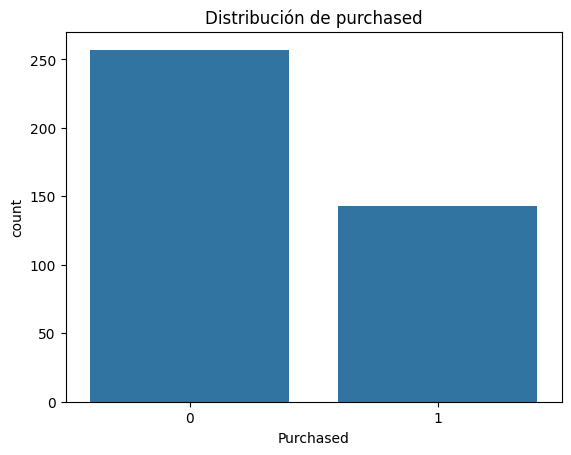

In [7]:
print("Distribución de la variable purchased:")
print(df['Purchased'].value_counts())

sns.countplot(x='Purchased', data=df)
plt.title("Distribución de purchased")
plt.show()

## 6. Análisis de la Distribución y Reflexión

Discute la distribución observada. Reflexiona sobre cómo un posible desbalance podría afectar la performance del modelo y qué estrategias se podrían utilizar para mitigarlo (por ejemplo, SMOTE en otros casos).

###Respuesta
La distribución de la variable Purchased muestra un desbalance moderado, con 257 casos de la clase "0" y 143 de la clase "1". Aunque la diferencia no es tan grande, sí influye en la capacidad del modelo para aprender correctamente ambas clases. El modelo podría inclinarse a predecir más la clase mayoritaria, reduciendo los aciertos en la clase minoritaria.
Para mitigar este impacto una opción es el sobremuestreo, aumentando los ejemplos de la clase minoritaria con la duplicación o generación de datos sintéticos con el método SMOTE. Otra estrategia es el submuestreo, reduciendo la cantidad de ejemplos de la clase mayoritaria para equilibrar la distribución. También se pueden usar los árboles de decisión con pesos ajustados o técnicas de optimización de pérdida que penalicen más los errores en la clase minoritaria.

## 7. Selección de Variables para el Modelo

Para este taller, se utilizarán las variables `Age` y `EstimatedSalary` como características para predecir `Purchased`.

**Pregunta:**
- ¿Por qué considerarían estas dos variables relevantes para predecir la compra?

###Respuesta
Age y Estimated Salary son relevantes para predecir la compra porque la edad nos da una idea del tipo de cosas que alguien podría comprar y el salario muestra si una persona puede pagar un producto. Estas variables nos dan indicios de las posibilidades de que alguien haga una compra.

In [8]:
x=df[['Age','EstimatedSalary']]
y=df['Purchased']

## 8. División de Datos: Entrenamiento y Prueba

Se dividirá el dataset en un 75% para entrenamiento y un 25% para prueba, aplicando estratificación para mantener la proporción de clases.

**Pregunta:**
- ¿Qué ventajas ofrece la estratificación al dividir el dataset?

###Respuesta
La estratificación asegura que el conjunto de entrenamiento y el de prueba tengan la misma proporción de clases que el dataset original. Esto es importante para que el modelo no se sesgue hacia la clase mayoritaria, obteniendo así una evaluación más precisa y una mejor generalización.



In [9]:
from sklearn.model_selection import train_test_split

# Dividir en train y test con estratificación
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42) #x changed to x

print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

# Mostrar la distribución de clases en el conjunto de entrenamiento
print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (300, 2)
Dimensiones del conjunto de prueba: (100, 2)
Distribución de clases en entrenamiento (proporciones):
Purchased
0    0.643333
1    0.356667
Name: proportion, dtype: float64


In [10]:
from imblearn.over_sampling import SMOTE
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(X_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
Purchased
1    0.5
0    0.5
Name: proportion, dtype: float64


## 9. Entrenamiento Inicial del Modelo de Árbol de Decisión

Se entrenará un modelo de Árbol de Decisión sin restricciones de profundidad utilizando el conjunto de entrenamiento.

**Pregunta:**
- ¿Qué implica entrenar un modelo sin restricciones de profundidad en términos de complejidad y riesgo de sobreajuste?

###Respuesta
Si se entrena un modelo de Árbol de Decisión sin restricciones de profundidad, se vuelve muy complejo y memoriza los datos de entrenamiento, lo que lo hace malo para predecir cosas nuevas (sobreajuste). Es como si estudiara solo para un examen específico y luego no supiera del tema en general.

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Regresión Logística
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

## 10. Evaluación del Modelo: Análisis de Métricas

Analizaremos las métricas de evaluación obtenidas (exactitud, precisión, recall, F1-Score) y la matriz de confusión.

**Pregunta:**
- ¿Qué información específica nos aporta la matriz de confusión respecto a los errores del modelo?

###Respuesta
La matriz de confusión nos permite ver los errores del modelo de manera más detallada al mostrar cuántas predicciones fueron correctas e incorrectas para cada clase.

Errores en los modelos:

- Árbol de Decisión (Test): 7 casos con errores tipo I (falsos positivos - FP) y 5 casos con errores tipo II (falsos negativos - FN)
- Regresión Logística (Test):  12 casos con errores tipo I (FP) y 9 casos con errores tipo II (FN)

En conclusión, el árbol de decisión comete menos errores, por lo que parece ser el mejor modelo en este caso.


Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        64
           1       0.82      0.86      0.84        36

    accuracy                           0.88       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.88      0.88      0.88       100

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        64
           1       0.69      0.75      0.72        36

    accuracy                           0.79       100
   macro avg       0.77      0.78      0.78       100
weighted avg       0.79      0.79      0.79       100



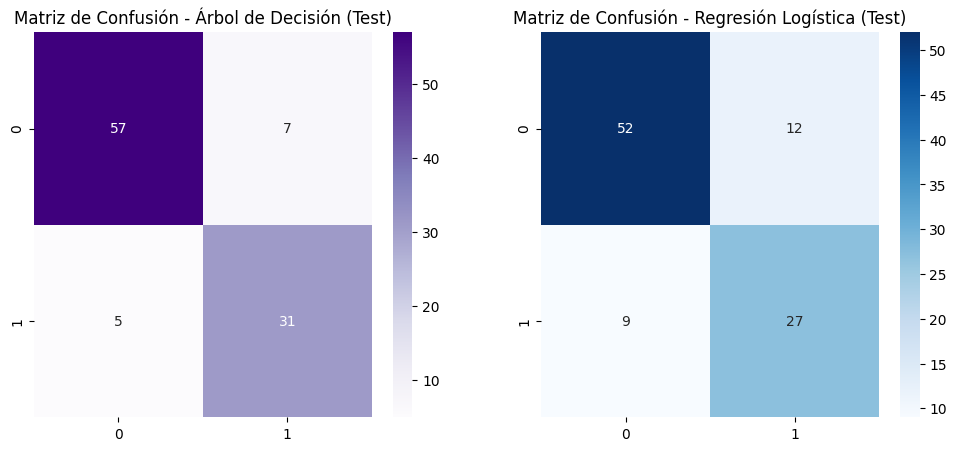

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       193
           1       1.00      0.99      0.99       193

    accuracy                           0.99       386
   macro avg       0.99      0.99      0.99       386
weighted avg       0.99      0.99      0.99       386

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       193
           1       0.86      0.87      0.86       193

    accuracy                           0.86       386
   macro avg       0.86      0.86      0.86       386
weighted avg       0.86      0.86      0.86       386



In [12]:
from sklearn.metrics import classification_report, confusion_matrix # Import necessary functions

## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

## 11. Visualización de la Curva ROC y Cálculo del AUC

Genera la curva ROC y calcula el AUC para evaluar la capacidad discriminativa del modelo.

**Pregunta:**
- ¿Cómo interpretan la curva ROC y qué indica un valor de AUC alto o bajo?

###Respuesta
La Curva ROC muestra qué tan bien un modelo separa las clases. Cuanto más se acerque la curva a la esquina superior izquierda, mejor será su desempeño.

El AUC indica la calidad del modelo donde:
- Más cerca de 1 → El modelo predice muy bien, tiene la mejor precisión.
- Cerca de 0.5 → Modelo aleatorio, no sirve mucho.
- Menos de 0.5 → El modelo es peor que el azar y algo está mal.

En la gráfica se puede observar:
- Regresión Logística AUC = 0.91 → Mejor modelo.
- Árbol de Decisión AUC = 0.88 → También es bueno, pero un poco menos preciso.

En conclusión, ambos modelos funcionan bien pero la regresión logística es un poco más precisa

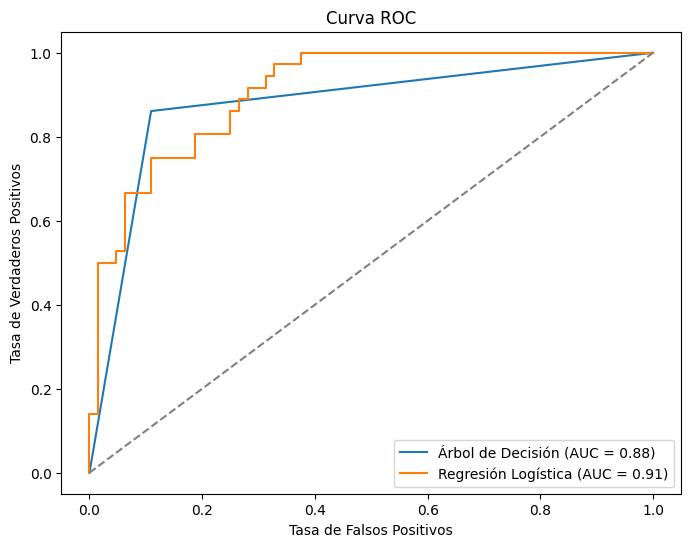

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

## 12. Visualización e Interpretación del Árbol de Decisión

Exporta y visualiza el árbol de decisión utilizando GraphViz y pydotplus. Analiza la estructura, las reglas y la importancia de cada nodo.

**Preguntas:**
- ¿Cuál es la regla de decisión en el primer nodo?
- ¿Cómo se interpretan las ramas y las hojas en relación a las variables `Age` y `EstimatedSalary`?
- ¿Qué partes del árbol podrían estar contribuyendo al sobreajuste?

###Respuestas
- La regla de decisión en el primer nodo se basa en la variable de Age. Si la edad de una persona es menor o igual a 30.5 años, el árbol se ramifica hacia la izquierda. Si es mayor a 30.5 años, se ramifica hacia la derecha
- Las ramas muestran las decisiones o condiciones basadas en las variables y las hojas representan el resultado final o la predicción que en este caso indican la probabilidad de compra
- Las partes del árbol que podrían estar contribuyendo al sobreajuste son las ramas muy profundas y específicas, con pocas muestras en las hojas. Esto indica que el modelo se está ajustando demasiado a los datos de entrenamiento y podría no generalizar bien los nuevos datos.

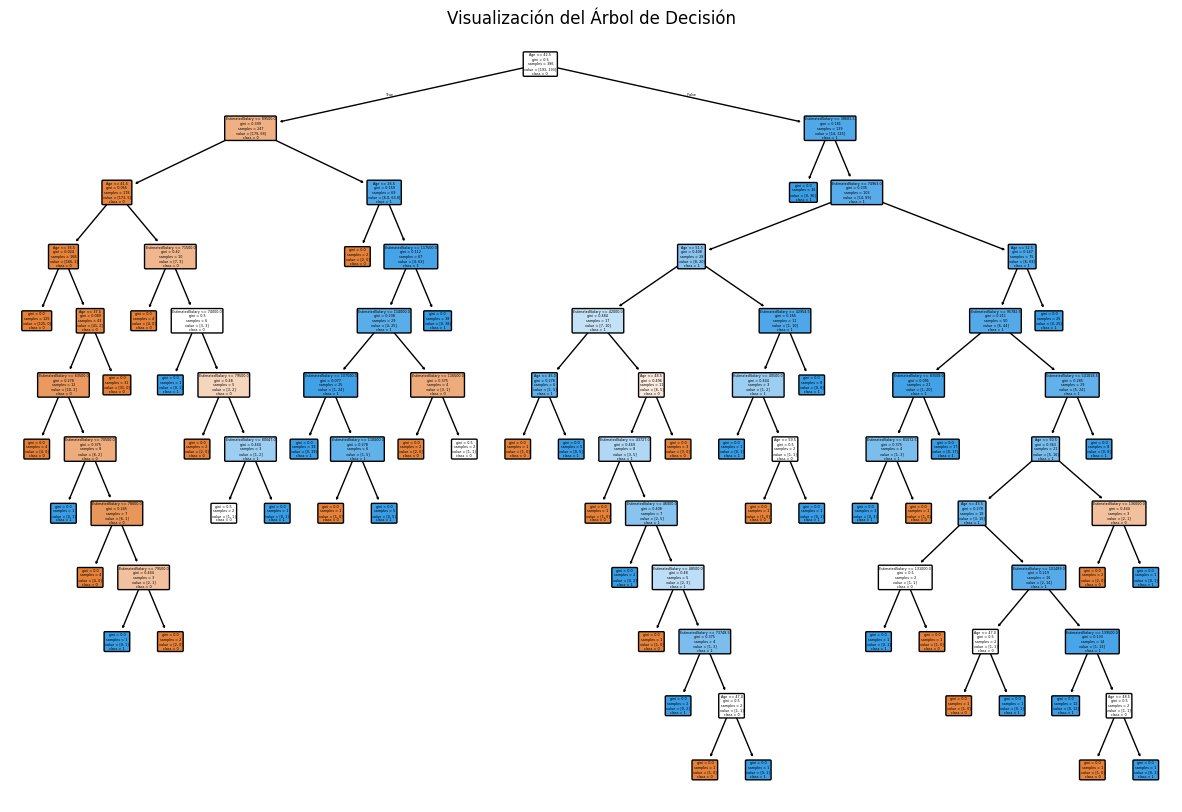

In [23]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=x.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

## 13. Análisis Crítico del Modelo Inicial

Revisa los resultados obtenidos en el modelo sin restricciones y discute:
- ¿Existen indicios de sobreajuste? ¿Cómo se comparan las métricas entre entrenamiento y prueba?
- ¿Qué mejoras se podrían implementar para optimizar la generalización del modelo?

###Respuestas
- Sí, hay indicios de sobreajuste. El modelo se desempeña mejor en los datos de entrenamiento que en los de prueba. En el conjunto de entrenamiento la precisión, el recall y F1-score estan cercanos al 100%. En el conjunto de prueba la precisión, el recall y F1-score estan alrededor del 85-88%.
- Para que el modelo funcione mejor con datos nuevos y no solo con los que ya conoce se puede limitar la profundidad del árbol para que no sea tan complejo y se ajuste demasiado a detalles específicos de los datos de entrenamiento. También se puede probar otros modelos como la Regresión Logística, para ver si alguno se ajusta mejor a los datos sin sobreajustarse.


## 14. Ajuste del Modelo: Control de la Profundidad

Entrena un segundo modelo de Árbol de Decisión limitando la profundidad (por ejemplo, `max_depth=5`) y evalúa su desempeño.

**Pregunta:**
- ¿Qué cambios se observan en las métricas al limitar la profundidad del árbol? ¿Cómo afecta esto a la capacidad del modelo de generalizar?

###Respuesta
Al limitar la profundidad del árbol, se observa que las métricas en el conjunto de entrenamiento disminuyen ligeramente ya que el modelo es menos complejo. Además, las métricas en el conjunto de prueba mejoran o se mantienen similares mostrando una mejor generalización. La diferencia entre las métricas de entrenamiento y prueba se reduce, lo que es una buena señal.
Limitar la profundidad del árbol reduce su complejidad, previene el sobreajuste y mejora la capacidad del modelo para generalizar con nuevos datos. El modelo se vuelve más confiable en situaciones reales.



In [17]:
dt_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_pruned.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [18]:
y_pred_pruned = dt_model_pruned.predict(X_test)
y_pred_train_pruned = dt_model_pruned.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_pruned))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       193
           1       0.95      0.95      0.95       193

    accuracy                           0.95       386
   macro avg       0.95      0.95      0.95       386
weighted avg       0.95      0.95      0.95       386



In [19]:
# Print the classification report
print(classification_report(y_test, y_pred_pruned))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_pruned))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        64
           1       0.83      0.83      0.83        36

    accuracy                           0.88       100
   macro avg       0.87      0.87      0.87       100
weighted avg       0.88      0.88      0.88       100

[[58  6]
 [ 6 30]]


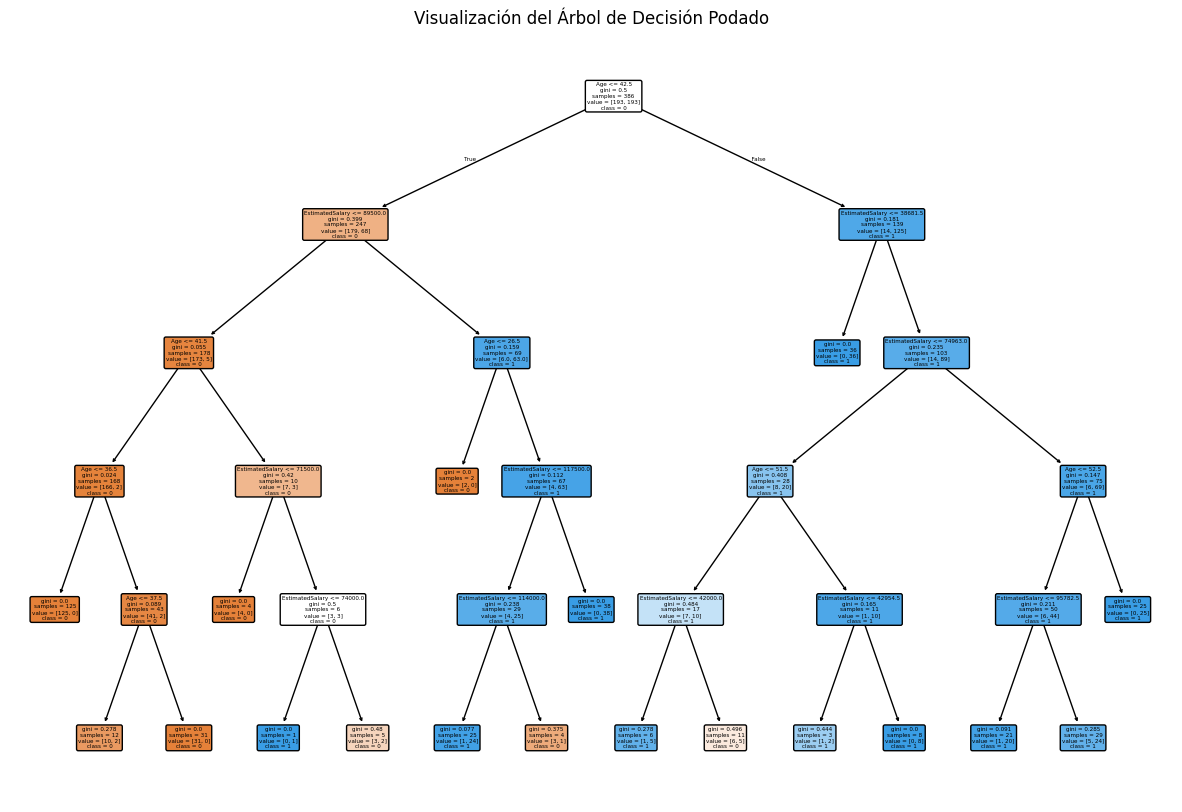

In [21]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model_pruned, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión Podado")
plt.show()

## 15. Discusión Final y Comparación de Modelos

Analiza y compara los resultados obtenidos del modelo inicial y el modelo ajustado. Reflexiona sobre los siguientes aspectos:
- ¿Cuál de los dos modelos ofrece un mejor balance entre complejidad e interpretabilidad?
- ¿Qué indicios sugieren un mejor comportamiento frente al sobreajuste?
- ¿Qué otros modelos (por ejemplo, Regresión Logística) podrían utilizarse como referencia para evaluar el desempeño?

Utiliza estos puntos para guiar una discusión profesional y técnica entre los participantes.

###Respuestas
- El modelo inicial (sin restricciones) es más complejo, con mayor profundidad y más ramas mientras que el modelo ajustado (con max_depth=5) es menos complejo y más fácil de interpretar. En conclusión, el modelo ajustado ofrece un mejor balance entre complejidad e interpretabilidad, ya que sacrifica un poco de complejidad para ganar interpretabilidad
- Indicios de mejor comportamiento frente al sobreajuste: En el modelo inicial se muestran indicios de sobreajuste, ya que su rendimiento en el conjunto de entrenamiento es mucho mejor que en el conjunto de prueba. En el modelo ajustado se muestra un mejor comportamiento frente al sobreajuste, ya que la diferencia entre las métricas de entrenamiento y prueba es menor.
- Se podrían utilizar como referencia para evaluar el desempeño otros modelos como la regresión logística ya que los datos son relativamente simples. Se debería comparar el rendimiento de ambos modelos (árbol de decisión ajustado y Regresión Logística) en el conjunto de prueba para determinar cuál es el más adecuado.